In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart_train.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
1,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
4,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0


## Разведочный анализ данных (построение графиков, нахождение корреляций)

In [3]:
df.shape

(242, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.330579,0.694215,0.921488,130.871901,247.384298,0.157025,0.512397,148.049587,0.338843,1.073140,1.367769,0.714876,2.318182,0.520661
std,9.046572,0.461694,1.033682,16.986329,52.392283,0.364578,0.532990,23.222486,0.474297,1.205684,0.612012,0.979725,0.639307,0.500608
min,29.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,131.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,0.500000,130.000000,243.000000,0.000000,0.000000,151.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.750000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
age         242 non-null int64
sex         242 non-null int64
cp          242 non-null int64
trestbps    242 non-null int64
chol        242 non-null int64
fbs         242 non-null int64
restecg     242 non-null int64
thalach     242 non-null int64
exang       242 non-null int64
oldpeak     242 non-null float64
slope       242 non-null int64
ca          242 non-null int64
thal        242 non-null int64
target      242 non-null int64
dtypes: float64(1), int64(13)
memory usage: 26.5 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропущенных значений нет.

### Распределение целевого класса

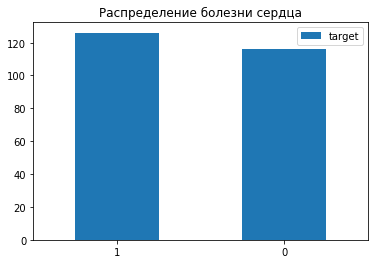

In [8]:
df['target'].value_counts().plot(kind='bar', label='target', rot=0)
plt.legend()
plt.title('Распределение болезни сердца');

#### Наблюдения: количество людей с болезнью незначительно отличается от количества здоровых людей. Выборка сбалансирована.

### От кого больше жалоб на боль по половому признаку?

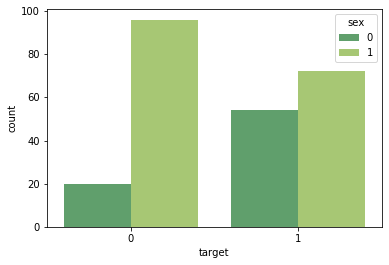

In [9]:
fig, ax = plt.subplots()
sns.countplot(x='target', data=df, hue='sex', palette='summer');

#### Наблюдения: по графику видно, что женщин, имеющих болезнь сердца, меньше, чем мужчин. Также можно сказать, что здоровых мужчин значительно больше, чем здоровых женщин.

### Зависимость target от возраста мужчин и женщин

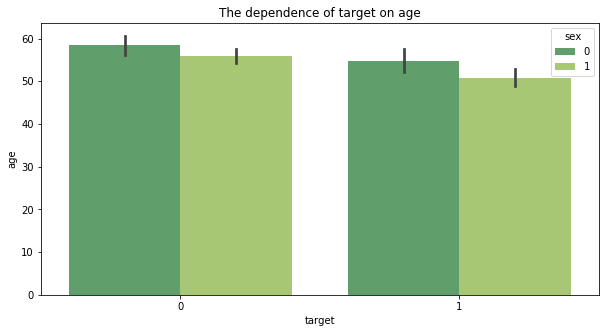

In [13]:
plt.figure(figsize=(10, 5))

sns.barplot(x='target', y='age', data=df, hue='sex', palette='summer')
plt.title('The dependence of target on age');

#### Наблюдения: чем выше возраст, тем больше жалоб на болезнь, причем мужчин больше, чем женщин.

### Зависимость target от cp

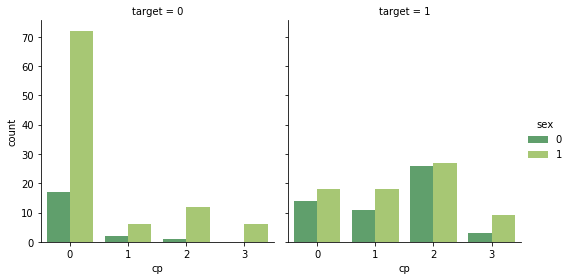

In [14]:
sns.catplot(x='cp', hue='sex', col='target', 
            data=df, kind='count',
            height=4, aspect=.9, palette='summer');

#### Наблюдения: значительная часть мужчин здоровы при типе боли равном 0. Target = 0 при значении cp=3 у мужчин. Большее количество мужчин и женщин имеют значение целевого признака равное 1 при значении cp равном 2.

### Зависимость target от артериального давления

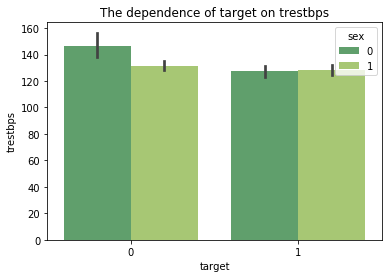

In [17]:
sns.barplot(x='target', y='trestbps', data=df, hue='sex', palette='summer')
plt.title('The dependence of target on trestbps');

#### Наблюдения: и мужчины, и женщины нездоровы, если их артериальное давление немного выше 120 мм рт.ст при поступлении в больницу.

### Зависимость target от холестерина

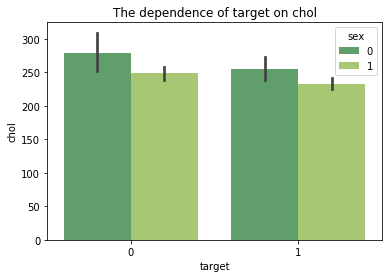

In [19]:
sns.barplot(x='target', y='chol', data=df, hue='sex', palette='summer')
plt.title('The dependence of target on chol');

#### Наблюдения: женщины больше подвержены болезни сердца, чем мужчины при значении холестерина больше 250 мг/дл.

### Зависимость target от уровня сахара в крови

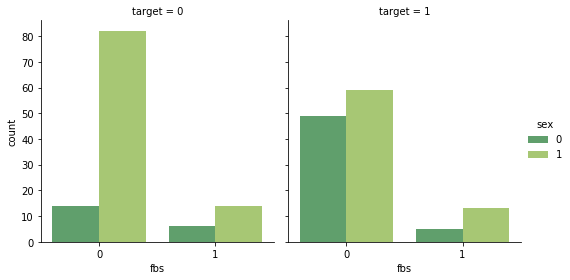

In [20]:
sns.catplot(x='fbs', hue='sex', col='target', 
            data=df, kind='count',
            height=4, aspect=.9, palette='summer');

#### Наблюдения: если уровень сахара в крови больше 120 мг/дл, то он незначительно влияет на болезнь сердца как у мужчин, так и у женщин. 

### Зависимость target от ЭКГ

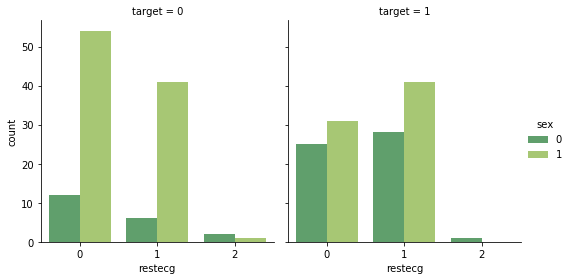

In [22]:
sns.catplot(x='restecg', hue='sex', col='target', 
            data=df, kind='count',
            height=4, aspect=.9, palette='summer');

### Зависимость target от пульса

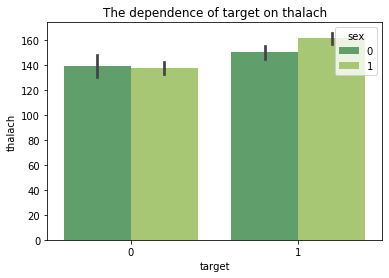

In [23]:
sns.barplot(x='target', y='thalach', data=df, hue='sex', palette='summer')
plt.title('The dependence of target on thalach');

#### Наблюдения: при пульсе свыше 140 мужчины и женщины подвержены болезни сердца.

### Зависимость target от exang

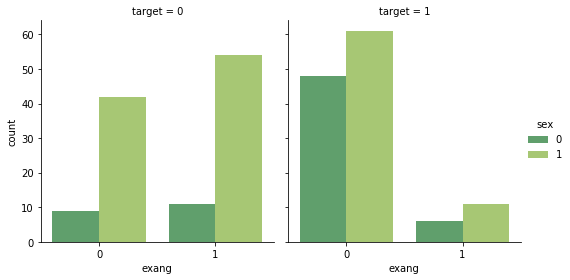

In [25]:
sns.catplot(x='exang', hue='sex', col='target', 
            data=df, kind='count',
            height=4, aspect=.9, palette='summer');

#### Видно, что физические нагрузки практически не влияют на возникновение стенокардии.

### Зависимость target от ca

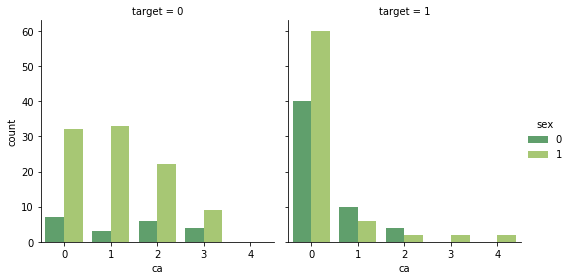

In [27]:
sns.catplot(x='ca', hue='sex', col='target', 
            data=df, kind='count',
            height=4, aspect=.9, palette='summer');

#### Наблюдения: значительное влияние на болезнь сердца оказывает са=0.

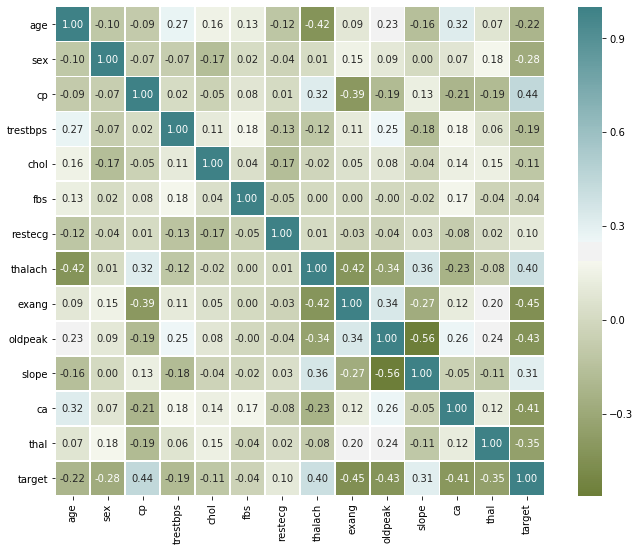

In [29]:
plt.figure(figsize=(12,9))

corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=.6, fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True);

Признаки cp, thalach и slope сильно коррелированы с целевой переменной.

## Машинное обучение

In [31]:
y = df.target
X = df.drop('target', axis=1)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Добавим в матрицу X полиномиальные признаки до степени 2

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_test = lr.predict(X_test)
pred_train = lr.predict(X_train)

print('lr accuracy on test:', round(accuracy_score(y_test, pred_test), 3))
print('lr accuracy on train:', round(accuracy_score(y_train, pred_train), 3))

lr accuracy on test: 0.878
lr accuracy on train: 0.917


#### Подбор гиперпараметров логистической регрессии 

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid_logit = {'C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(lr, param_grid_logit,\
                          cv=3, n_jobs=-1)

In [35]:
%%time
grid_logit.fit(X_train, y_train)

CPU times: user 118 ms, sys: 47.9 ms, total: 166 ms
Wall time: 3.33 s


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
grid_logit.best_params_, grid_logit.best_score_

({'C': 0.01}, 0.8238341968911918)

In [37]:
# Обучим логистическую регрессию с параметром регуляризации С=0.01

C = 1e-02
log_reg = LogisticRegression(C=C, n_jobs=-1, random_state=17)
log_reg.fit(X_train, y_train)

print('Доля правильных ответов классификатора на обучающей выборке:', 
      round(log_reg.score(X_train, y_train), 3))

print('Доля правильных ответов классификатора на тестовой выборке:', 
      round(log_reg.score(X_test, y_test), 3))


Доля правильных ответов классификатора на обучающей выборке: 0.829
Доля правильных ответов классификатора на тестовой выборке: 0.878


#### Проверка модели на переобученность

In [38]:
pred_train_logreg = log_reg.predict(X_train)
pred_test_logreg = log_reg.predict(X_test)

print('score on train: {0}, score on test: {1}'.format(round(accuracy_score(pred_train_logreg, y_train), 3),\
                                                        round(accuracy_score(pred_test_logreg, y_test), 3)))

score on train: 0.829, score on test: 0.878


#### Построение ROC-кривой и вычисление ROC_AUC на тренировочной и тестовой выборках.

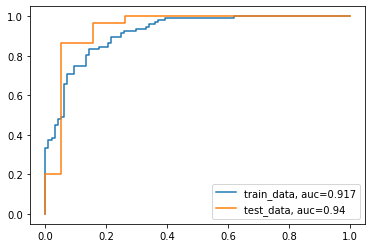

In [40]:
from sklearn import metrics

pred_train = log_reg.predict_proba(X_train)[::,1]
pred_test = log_reg.predict_proba(X_test)[::,1]

fpr_train, tpr_train, _ = metrics.roc_curve(y_train, pred_train)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, pred_test)

auc_train = metrics.roc_auc_score(y_train, pred_train)
auc_test = metrics.roc_auc_score(y_test, pred_test)

plt.plot(fpr_train, tpr_train, label='train_data, auc='+str(round(auc_train, 3)))
plt.plot(fpr_test, tpr_test, label='test_data, auc='+str(round(auc_test, 3)))
plt.legend(loc=4)

Значение AUC достаточно высокое, что говорит о  высоком качестве модели.

#### Вычисление accuracy, precision, recall, f1-score.

In [41]:
matrix = metrics.confusion_matrix(y_test, pred_test_logreg)
print(matrix)

[[14  5]
 [ 1 29]]


In [42]:
matrix.diagonal().sum() # на главной диагонали количество элементов, на которые ответили правильно

43

TN = 14 случаев правильно классифицированы как отрицательные (нет болезни сердца), TP = 29 случая правильно классифицированы как положительные (есть болезнь сердца), FN = 1 случай классифицирован неверно - наличие болезни сердца классифицировано как ее отсутствие, FP = 5 случаев классифицированы неверно - отсутствие болезни сердца классифицировано как ее наличие.

In [43]:
round(accuracy_score(y_test, log_reg.predict(X_test)), 3) # доля правильно классифицированных объектов

0.878

In [44]:
# точность классификации объектов к нулевому классу - отсутствие болезни
round(metrics.precision_score(y_test, log_reg.predict(X_test), pos_label=0), 3)

0.933

In [45]:
# точность при отнесении объектов к первому классу - налчичие болезни
round(metrics.precision_score(y_test, log_reg.predict(X_test)), 3)

0.853

In [46]:
# полнота для нулевого класса - способность модели правильно определять наличие болезни
round(metrics.recall_score(y_test, log_reg.predict(X_test), pos_label=0), 3)

0.737

In [47]:
# полнота для первого класса
round(metrics.recall_score(y_test, log_reg.predict(X_test), pos_label=1), 3)

0.967

In [48]:
round(metrics.f1_score(y_test, log_reg.predict(X_test), pos_label=0), 3)

0.824

In [49]:
round(metrics.f1_score(y_test, log_reg.predict(X_test)), 3)

0.906